In [2]:
# importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data
covidData =pd.read_csv(r'COVID-19 Global Statistics Dataset.csv')

In [4]:
covidData

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN


In [5]:
# this dataset has lots of NaN values 
# lets see how many NaN values are there in the dataset by percentage

missing_percent = covidData.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

New Deaths           97.071130
New Cases            94.979079
New Recovered        92.887029
Serious, Critical    74.895397
Total Recovered      20.502092
Active Cases         20.083682
Tests/1M pop         10.878661
Total Tests          10.878661
Deaths/1M pop         5.857741
Population            4.184100
Tot Cases/1M pop      3.765690
Total Deaths          2.092050
Country               0.000000
Total Cases           0.000000
dtype: float64


In [6]:
# we will drop the columns with more than 70% NaN values
CovidData1 = covidData.dropna(axis=1, thresh=0.7 * len(covidData)) 

In [7]:
CovidData1

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209","1,199,031","109,053,249","1,114,929","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429","533,475",NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560","167,642","39,970,918",0,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284","182,439","38,240,600","396,245","462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327","709,765","36,249,161","1,448,401","178,345","3,296","63,776,166","296,146","215,353,593"
...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773","1,365,551","66,648,277","1,777,945",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","32,665","14,572,565","221,550",NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770","258,884","12,089,899","510,987",NaN,NaN,NaN,NaN,NaN
237,Total:,721,15,706,0,NaN,NaN,NaN,NaN,NaN


In [8]:
# we will drop rows with NaN values
CovidData2 = CovidData1.dropna(axis=0, how='any')
CovidData2

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209","1,199,031","109,053,249","1,114,929","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
2,France,"40,138,560","167,642","39,970,918",0,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284","182,439","38,240,600","396,245","462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327","709,765","36,249,161","1,448,401","178,345","3,296","63,776,166","296,146","215,353,593"
5,S. Korea,"34,571,873","35,934","34,535,939",0,"673,523",700,"15,804,065","307,892","51,329,899"
...,...,...,...,...,...,...,...,...,...,...
215,Nauru,"5,393",1,"5,347",45,"494,635",92,"20,509","1,881,042","10,903"
218,Wallis and Futuna,"3,550",8,438,"3,104","323,256",728,"20,508","1,867,419","10,982"
219,Saint Pierre Miquelon,"3,452",2,"2,449","1,001","599,410",347,"25,400","4,410,488","5,759"
223,Montserrat,"1,403",8,"1,376",19,"282,578","1,611","17,762","3,577,442","4,965"


In [9]:
# sum of all the deaths reported

# we will convert the 'Total Deaths' column to numeric
CovidData2['Total Deaths'] = CovidData2['Total Deaths'].str.replace(',', '')


total_deaths = CovidData2['Total Deaths'].sum()


C:\Users\Nancy\AppData\Local\Temp\ipykernel_8320\2576774483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData2['Total Deaths'] = CovidData2['Total Deaths'].str.replace(',', '')


In [10]:
print("Total Deaths: ", total_deaths)


Total Deaths:  11990311676421824397097653593419625723211240226412176043206190051307332299233495816203314314622542280931124186449737347583483437612707345644350322216114452668641025956886088141933145422729318057553325375490392121914122948030664119396636138489895710038737186872028310952224078530360438726766422841203171186675104001574136543841689719495540458562461369064377574877616382997140695689225360528012845688131555737163722507984299142304390316410336321462305614681974882648193722814684201971835142713008851426417504699721316538307670295292105129046884472386074337410163136112838613812340023816514718331137418911337214212159389210331212417714629519428040481018285272


In [11]:
# Clean the Population column
CovidData2['Population'] = (
    CovidData2['Population']
    .astype(str)  # Convert to string first
    .str.replace(',', '')  # Remove thousands separators
    .str.replace(' ', '')  # Remove any spaces
    .replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters except decimal point
    .replace('', '0')  # Handle empty strings
    .astype(float)  # Convert to float
)

# Now calculate the sum
total_population = CovidData2['Population'].sum()
print(f"Total Population: {total_population:,.0f}")  # Formats with commas

Total Population: 5,709,039,411


C:\Users\Nancy\AppData\Local\Temp\ipykernel_8320\2283206130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData2['Population'] = (


In [12]:
# summing Recovered cases

CovidData2['Total Recovered'] = (
    CovidData2['Total Recovered']
    .astype(str)  # Convert to string first
    .str.replace(',', '')  # Remove thousands separators
    .str.replace(' ', '')  # Remove any spaces
    .replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters except decimal point
    .replace('', '0')  # Handle empty strings
    .astype(float)  # Convert to float
)

# Now calculate the sum
total_recovered = CovidData2['Total Recovered'].sum()
print(f" Total Recovered	: {total_recovered:,.0f}")  # Formats with commas

 Total Recovered	: 542,744,977


C:\Users\Nancy\AppData\Local\Temp\ipykernel_8320\491499284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData2['Total Recovered'] = (


In [13]:
# total tests conducted
CovidData2['Total Tests'] = (
    CovidData2['Total Tests']
    .astype(str)  # Convert to string first
    .str.replace(',', '')  # Remove thousands separators
    .str.replace(' ', '')  # Remove any spaces
    .replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters except decimal point
    .replace('', '0')  # Handle empty strings
    .astype(float)  # Convert to float
)
# Now calculate the sum
total_tests = CovidData2['Total Tests'].sum()
print(f"Total Tests: {total_tests:,.0f}")  # Formats with commas

Total Tests: 5,179,549,584


C:\Users\Nancy\AppData\Local\Temp\ipykernel_8320\1541881691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData2['Total Tests'] = (


In [14]:
# summing active cases
CovidData2['Active Cases'] = (
    CovidData2['Active Cases']
    .astype(str)  # Convert to string first
    .str.replace(',', '')  # Remove thousands separators
    .str.replace(' ', '')  # Remove any spaces
    .replace('[^0-9.]', '', regex=True)  # Remove non-numeric characters except decimal point
    .replace('', '0')  # Handle empty strings
    .astype(float)  # Convert to float
)
# Now calculate the sum
total_active_cases = CovidData2['Active Cases'].sum()
print(f"Total Active Cases: {total_active_cases:,.0f}")  # Formats with commas

Total Active Cases: 6,077,858


C:\Users\Nancy\AppData\Local\Temp\ipykernel_8320\14167724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CovidData2['Active Cases'] = (


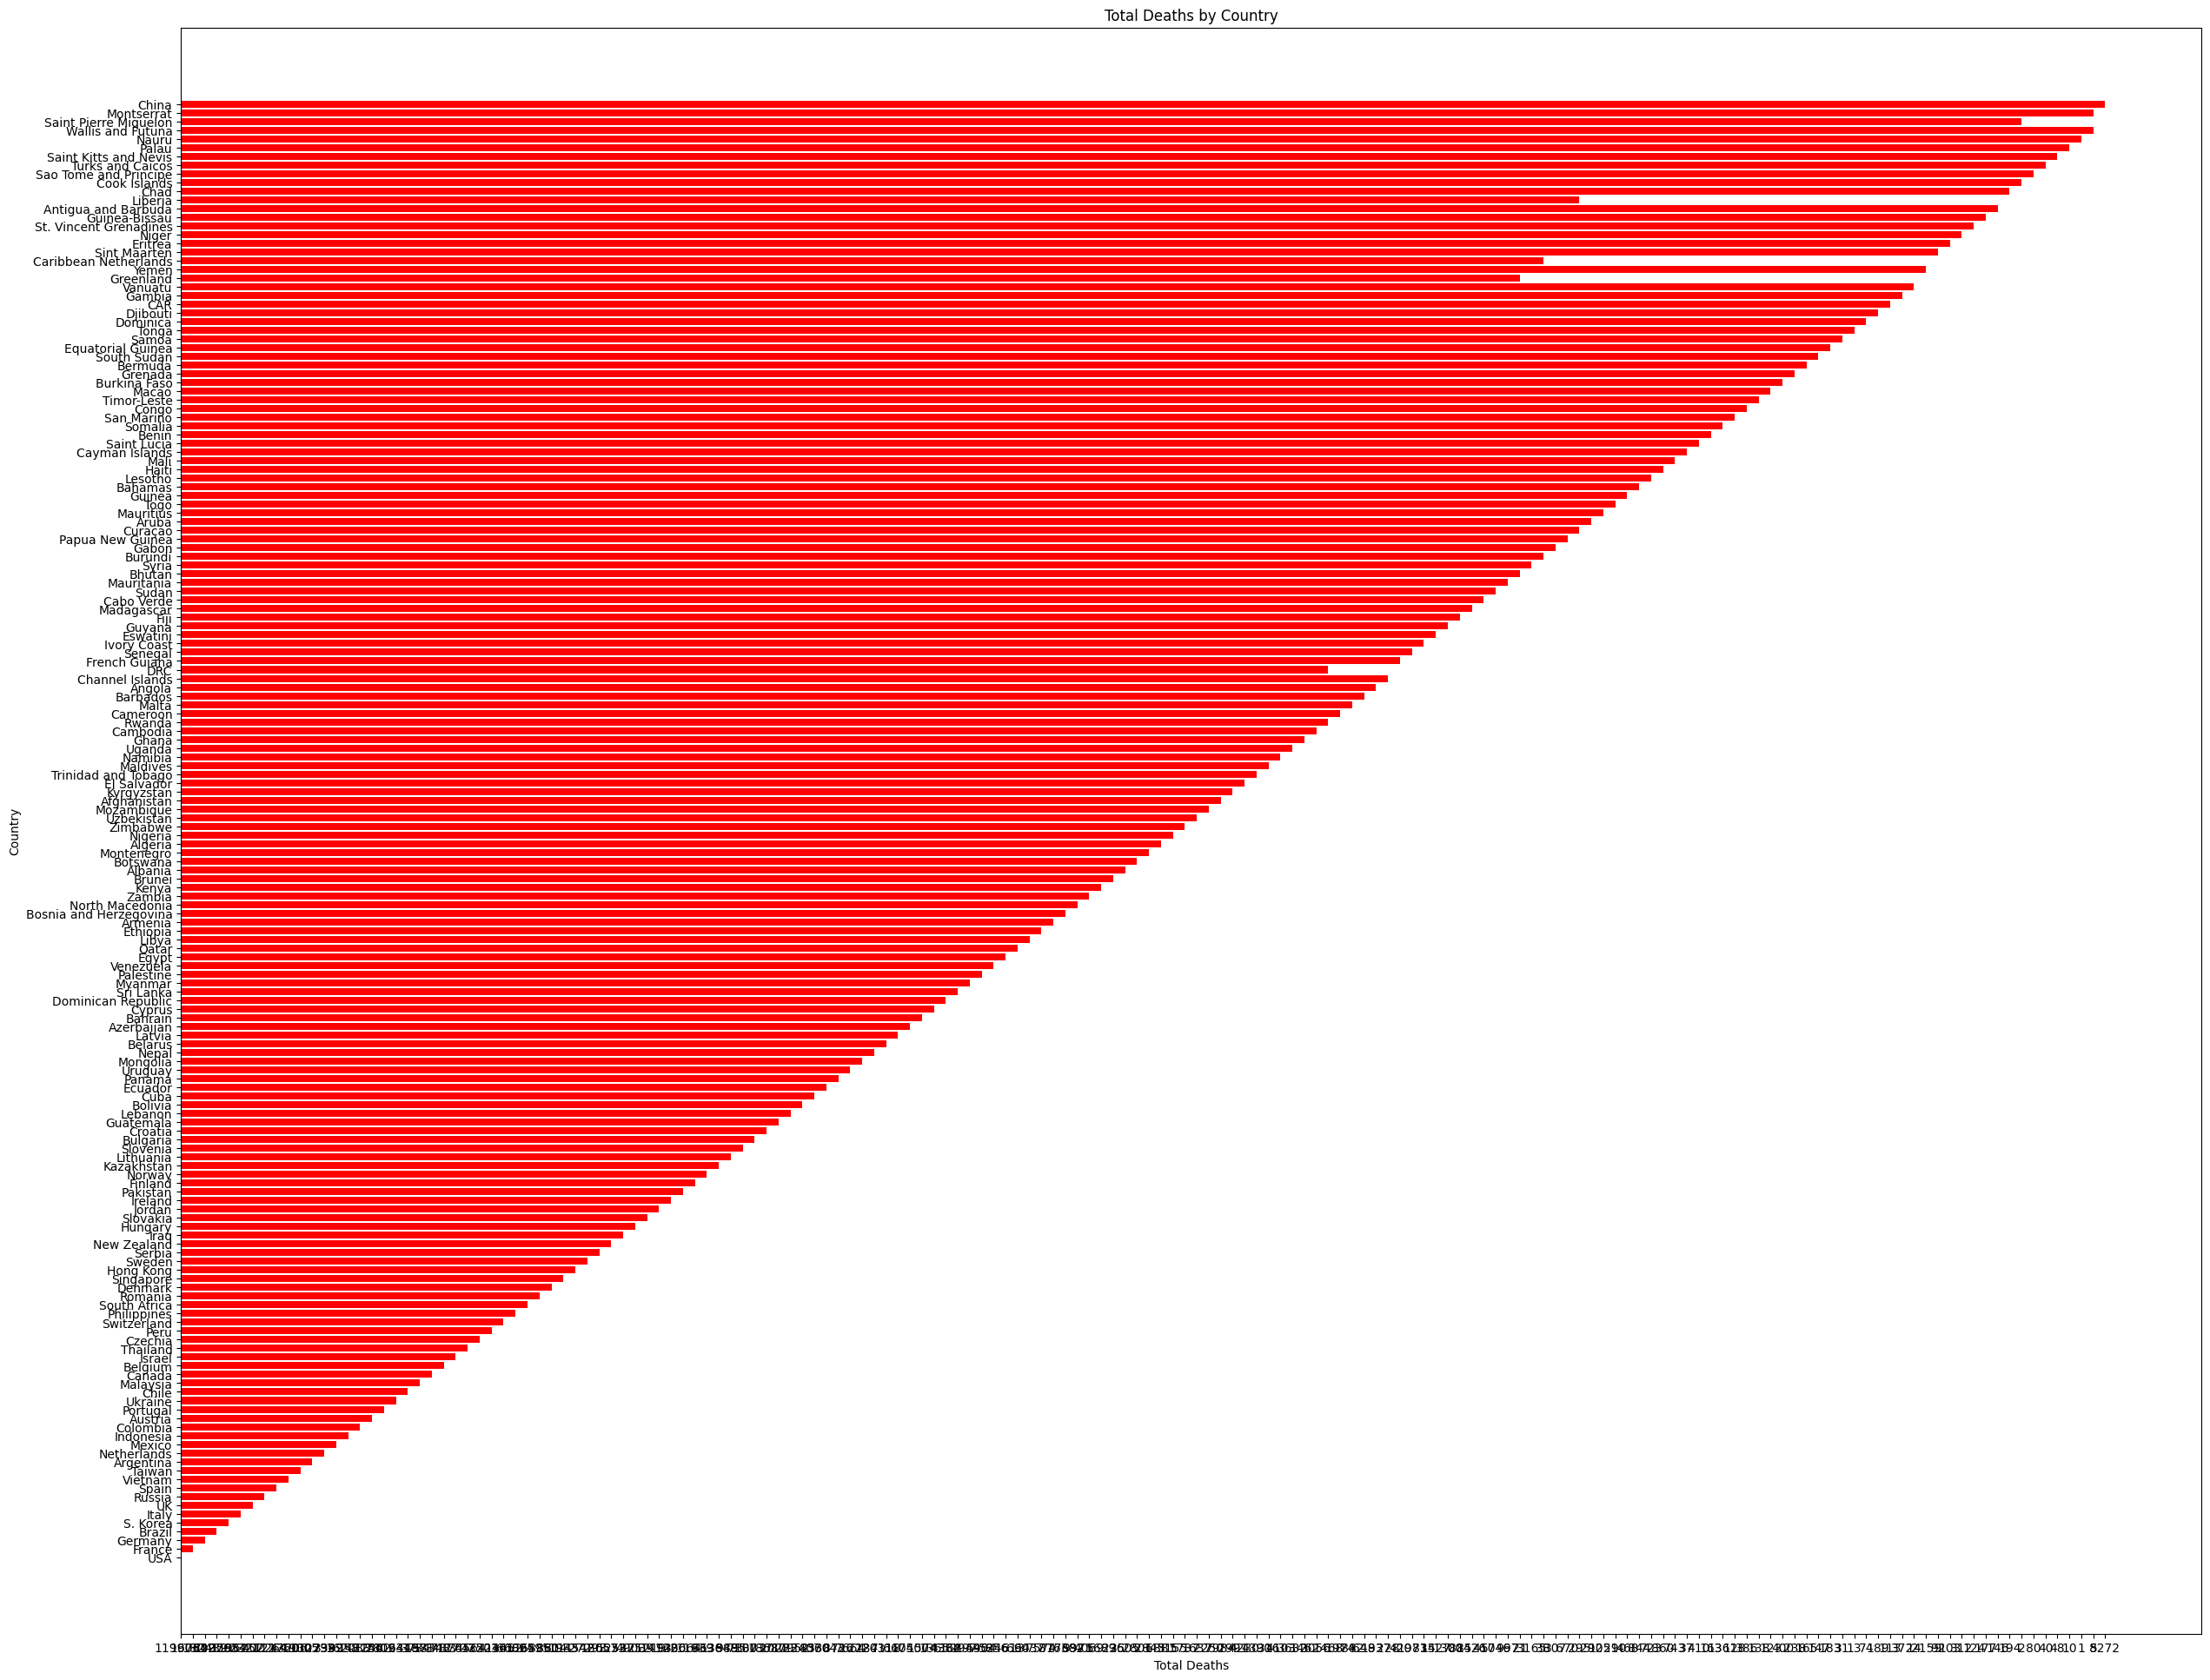

In [ ]:
# visualization of total deaths against total population
# on the  x  axis-numbers of deaths
# on the y axis- country
plt.figure(figsize=(60, 48))
plt.barh(CovidData2['Country'], CovidData2['Total Deaths'], color='red')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.title('Total Deaths by Country')
plt.show()

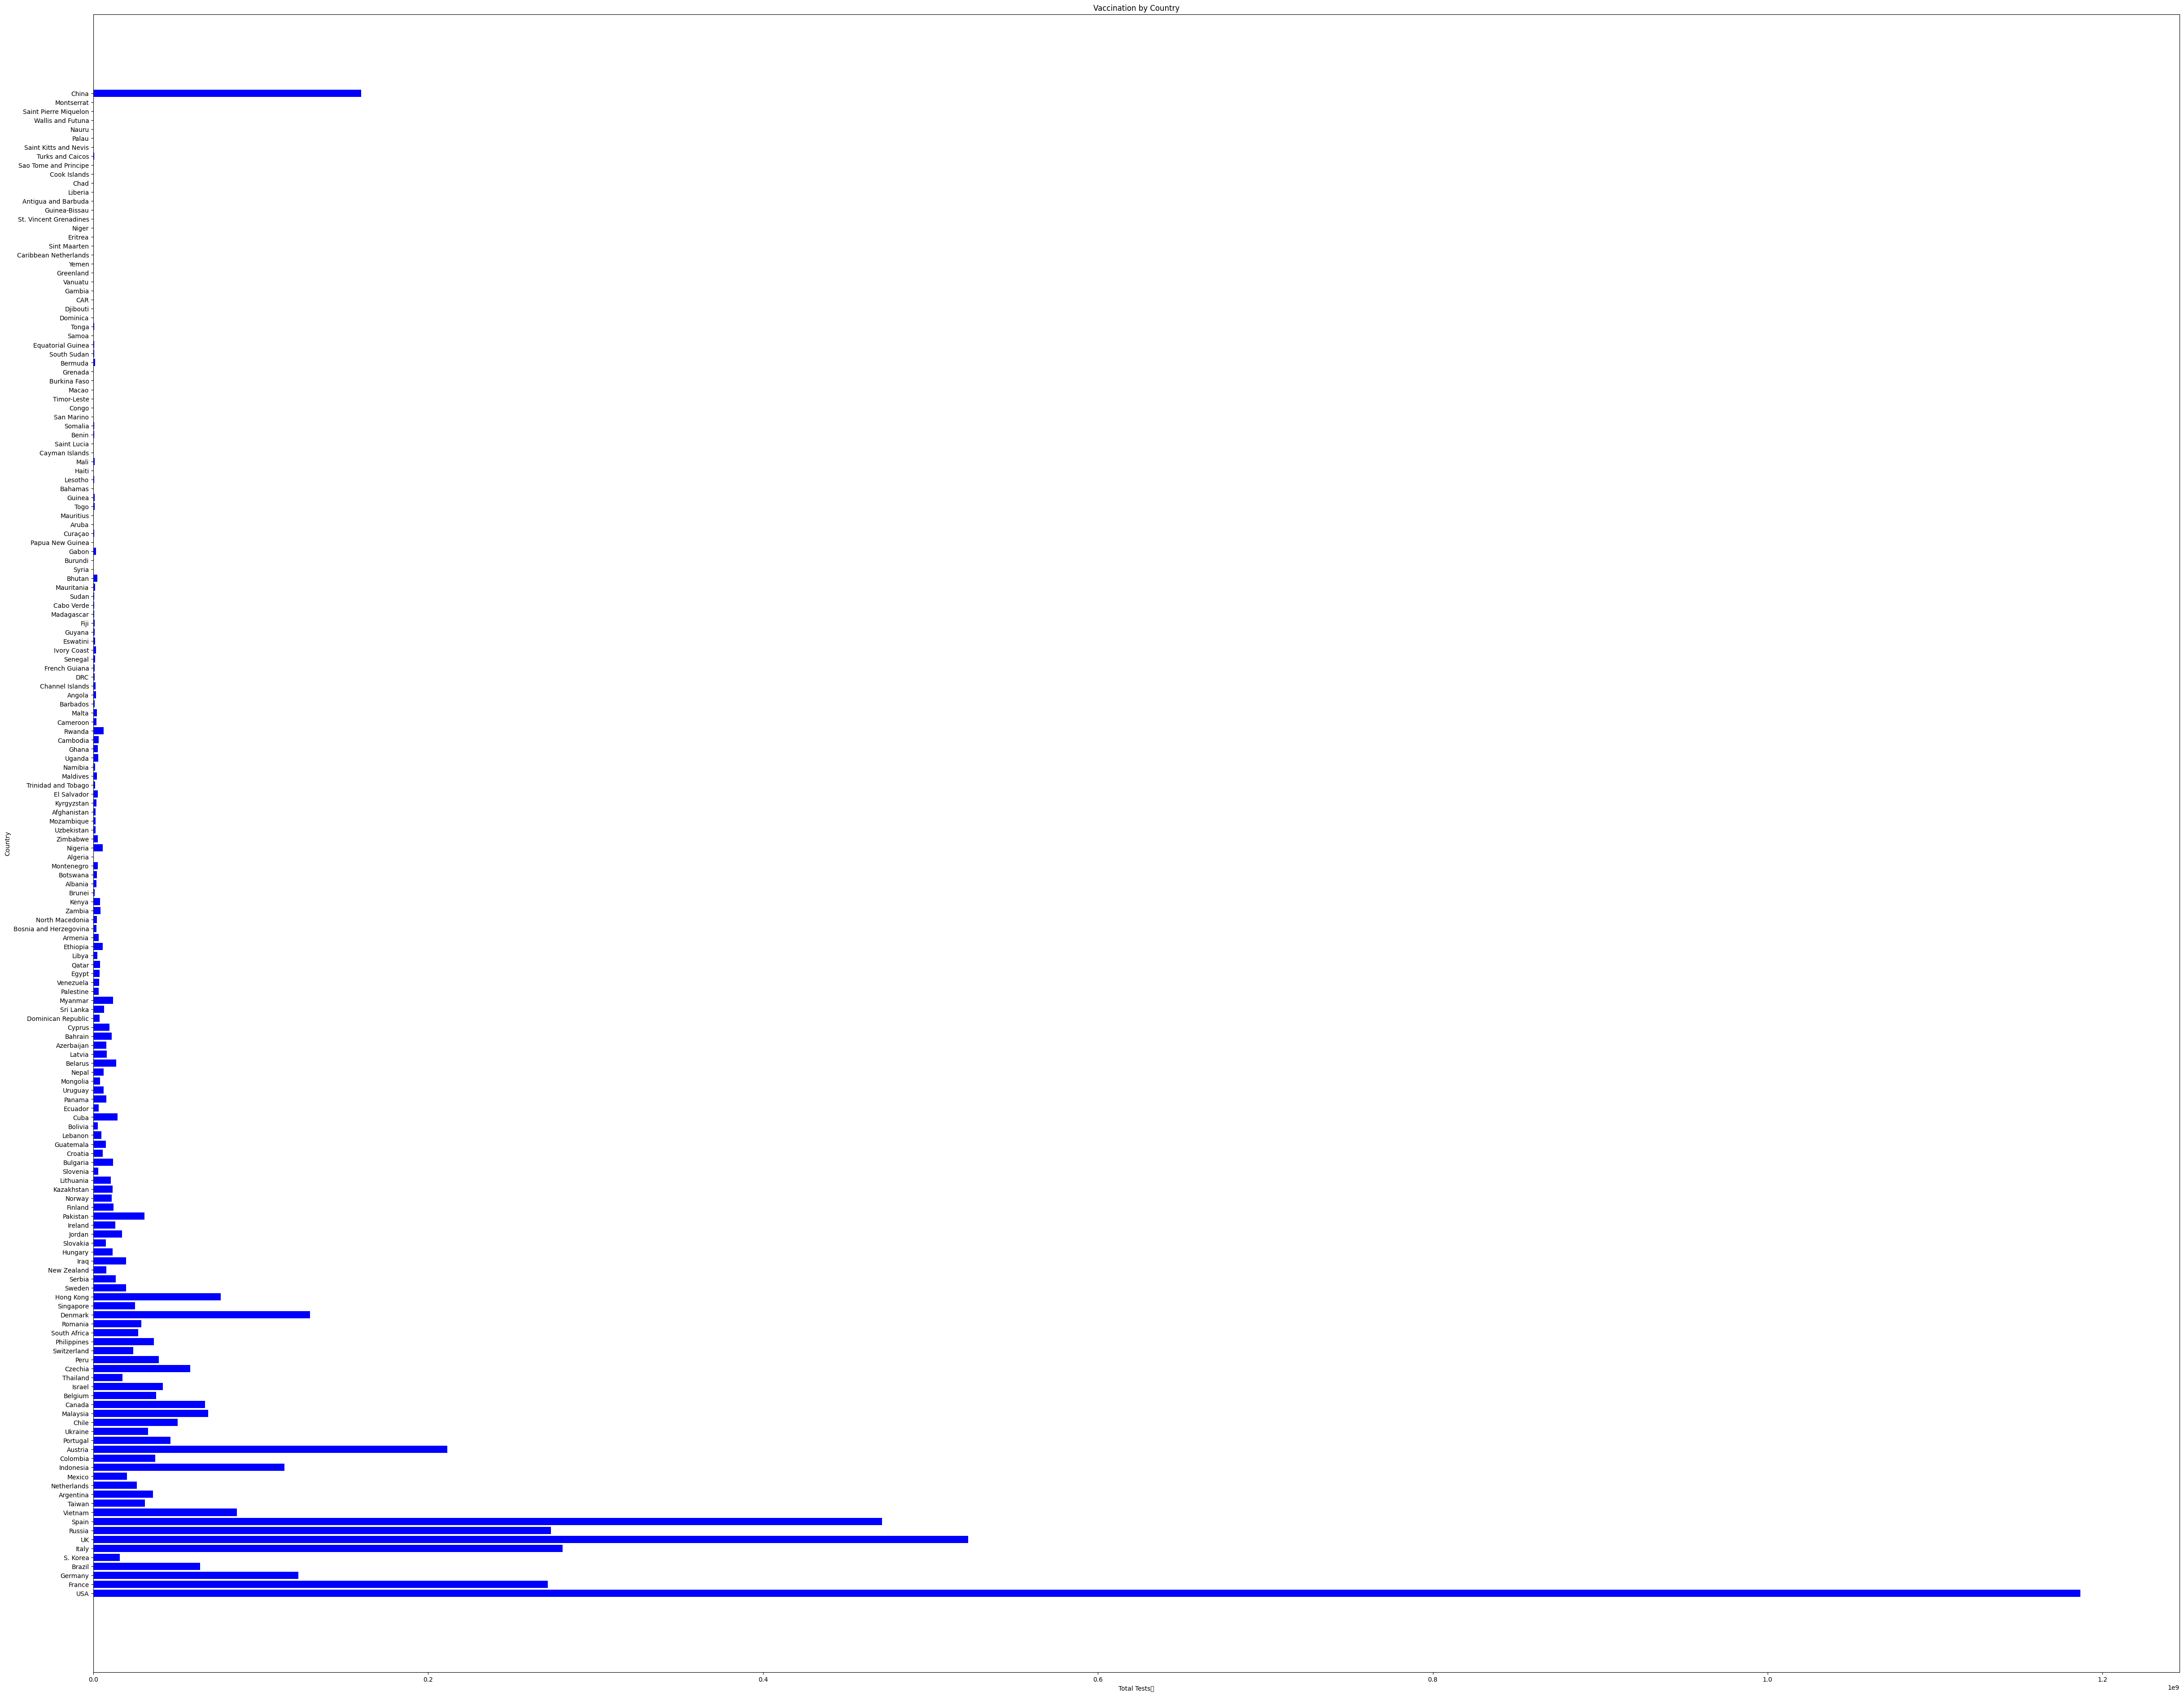

In [23]:
# visualization of vaccination by country
# on the  x  axis-numbers of vaccination
# on the y axis- country
plt.figure(figsize=(60, 48))
plt.barh(CovidData2['Country'], CovidData2['Total Tests'], color='blue')
plt.xlabel('Total Tests	')
plt.ylabel('Country')

plt.title('Vaccination by Country')
plt.show()